In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# 加载matlab的cell数据
polar_data = scipy.io.loadmat('polar.mat')

In [3]:
p_x = polar_data['p_x']
p_y = polar_data['p_y']
p_z = polar_data['p_z']
#TDA = p_x[5,5]
#TDA = np.array(TDA)
#print(TDA.shape)

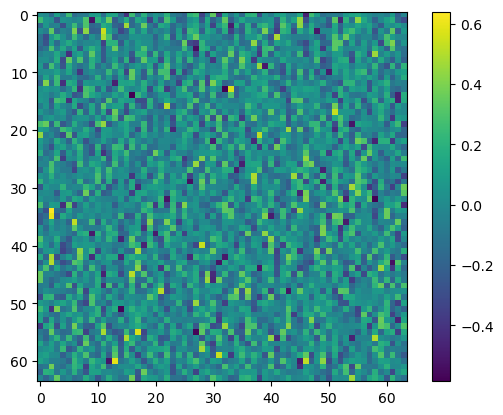

In [8]:
plt.imshow(p_y[:,:,10],cmap='viridis')
plt.colorbar()
plt.show()
#plt.imshow(p_x[:,:,10],cmap='viridis')
#plt.colorbar()
#plt.show()

In [9]:
#极化投影图
polarplot_data = scipy.io.loadmat('polarplot.mat')

In [10]:
rho = polarplot_data['rho']
theta = polarplot_data['theta']
P = polarplot_data['P']

In [11]:
# # 内部
# r = rho[:,:,2:16]
# t = theta[:,:,2:16]
# p = P[:,:,2:16]

# # 半层
# r = rho[:,:,0:9]
# t = theta[:,:,0:9]
# p = P[:,:,0:9]

# # 表面
# r = rho[:,:,0:3]
# t = theta[:,:,0:3]
# p = P[:,:,0:3]

# 全部
r = rho
t = theta
p = P

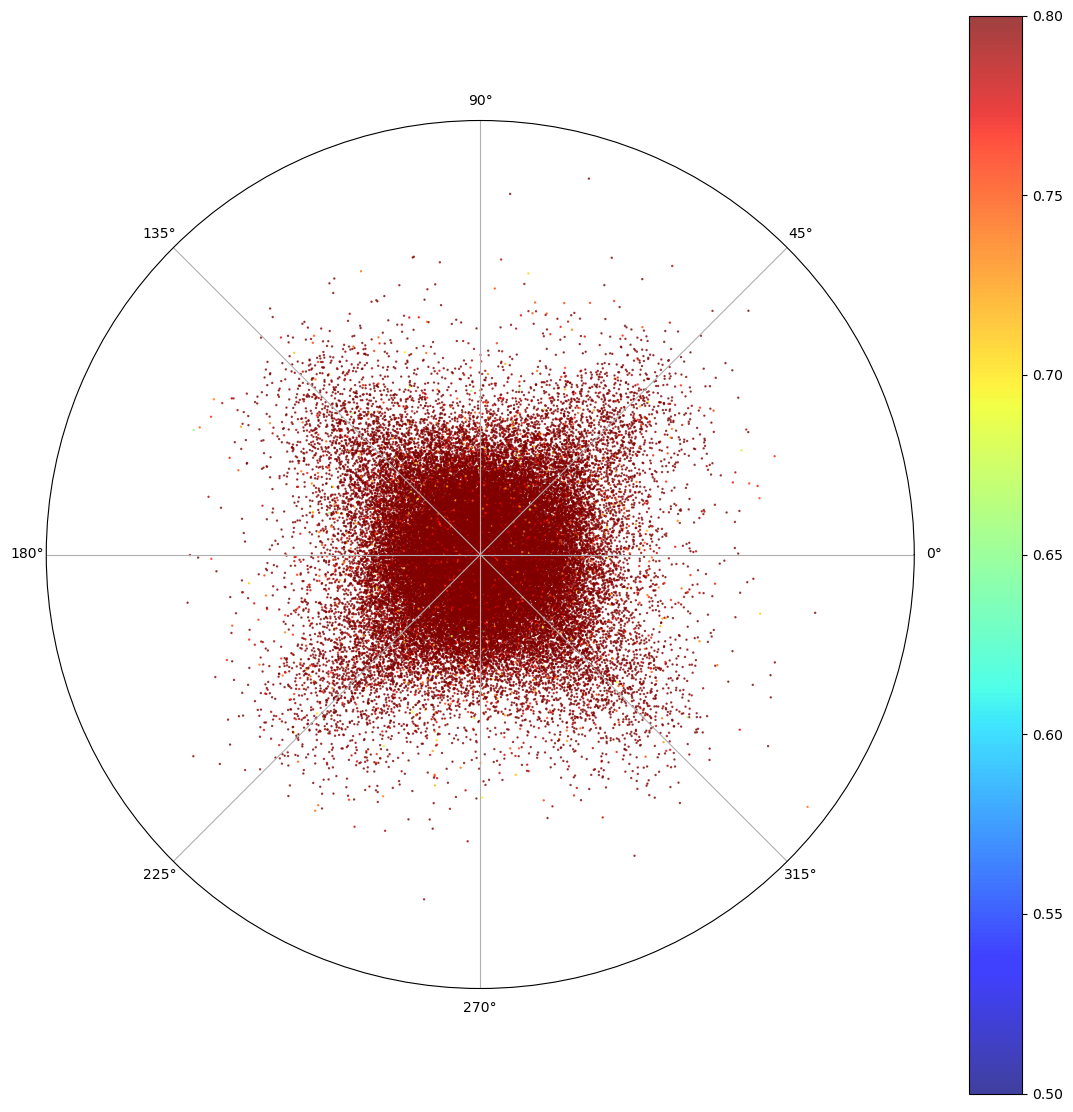

In [12]:
# 将三维数组展开为一维数组以用于绘图
rho_flat = r.flatten()
theta_flat = t.flatten()
p_flat = p.flatten()

# 创建极坐标图
plt.figure(figsize=(14,14))
ax = plt.subplot(111,projection='polar')
norm = mcolors.Normalize(vmin=0.5, vmax=0.8)

# 绘制散点图
scatter = ax.scatter(theta_flat,rho_flat,c=p_flat,cmap='jet',norm=norm,s=0.5,alpha=0.75)

ax.set_yticklabels([])
ax.yaxis.set_visible(False)  # 隐藏径向刻度线
ax.xaxis.set_visible(True)   # 保留角度刻度线

plt.colorbar(scatter,ax=ax)
# plt.savefig('polar_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()
